In [206]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV


In [138]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

In [139]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [140]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [141]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [142]:
train_df.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [143]:
train_df.groupby(['Pclass'], as_index = False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [144]:
train_df.groupby(['Sex'], as_index = False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [145]:
train_df.groupby(['SibSp'], as_index = False)['Survived'].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [146]:
train_df.groupby(['Parch'], as_index = False)['Survived'].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [147]:
train_df['Family_Size'] = train_df['SibSp'] + train_df['Parch'] + 1 
test_df['Family_Size'] = train_df['SibSp'] + train_df['Parch'] + 1 

In [148]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2


In [149]:
train_df.groupby(['Family_Size'], as_index = False)['Survived'].mean()

,Family_Size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [150]:
family_map = {1 : 'Alone', 2 : 'Small', 4 : 'Small', 5 : 'Medium', 6 : 'Medium', 7 : 'Large', 8 : 'Large', 11 : 'Large'}
train_df['Family_Size_Grouped'] = train_df['Family_Size'].map(family_map)
test_df['Family_Size_Grouped'] = train_df['Family_Size'].map(family_map)

In [151]:
train_df.groupby(['Family_Size_Grouped'], as_index = False)['Survived'].mean()

,Family_Size_Grouped,Survived
0,Alone,0.303538
1,Large,0.160000
2,Medium,0.162162
3,Small,0.578947


In [152]:
train_df.groupby(['Embarked'], as_index = False)['Survived'].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

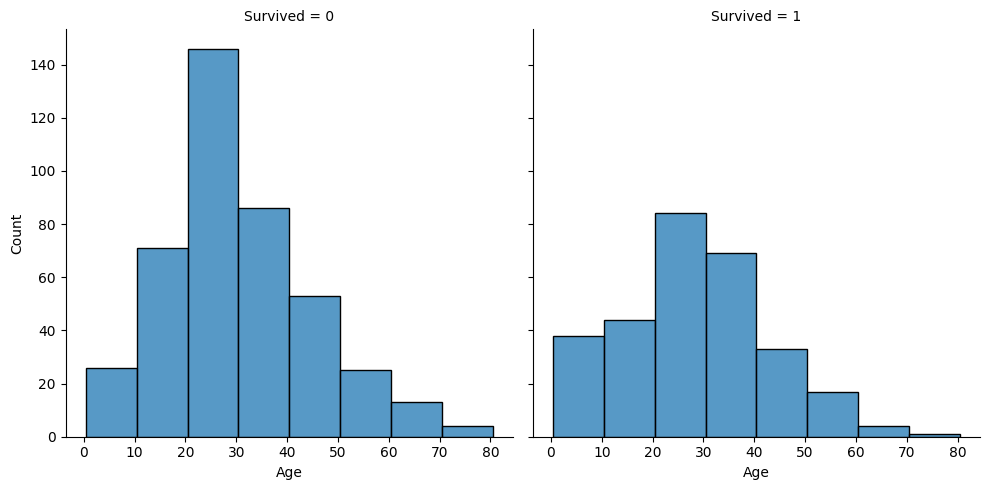

In [153]:
sns.displot(train_df, x = 'Age', col = 'Survived', binwidth = 10, height= 5)

In [154]:
train_df['Age_Cut'] = pd.qcut(train_df['Age'], 8)
test_df['Age_Cut'] = pd.qcut(test_df['Age'], 8)

In [155]:
train_df.groupby(['Age_Cut'], as_index = False)['Survived'].mean()

/tmp/ipykernel_30/1359979237.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Age_Cut'], as_index = False)['Survived'].mean()


,Age_Cut,Survived
0,"(0.419, 16.0]",0.550000
1,"(16.0, 20.125]",0.341772
2,"(20.125, 24.0]",0.367347
3,"(24.0, 28.0]",0.352941
4,"(28.0, 32.312]",0.416667
5,"(32.312, 38.0]",0.450549
6,"(38.0, 47.0]",0.329545
7,"(47.0, 80.0]",0.415730


In [156]:
# Binning 'Age' for train_df
train_df.loc[train_df['Age'] <= 16, 'Age'] = 0
train_df.loc[(train_df['Age'] > 16) & (train_df['Age'] <= 20.125), 'Age'] = 1
train_df.loc[(train_df['Age'] > 20.125) & (train_df['Age'] <= 24), 'Age'] = 2
train_df.loc[(train_df['Age'] > 24) & (train_df['Age'] <= 28), 'Age'] = 3
train_df.loc[(train_df['Age'] > 28) & (train_df['Age'] <= 32.312), 'Age'] = 4
train_df.loc[(train_df['Age'] > 32.312) & (train_df['Age'] <= 38), 'Age'] = 5
train_df.loc[(train_df['Age'] > 38) & (train_df['Age'] <= 47), 'Age'] = 6
train_df.loc[(train_df['Age'] > 47) & (train_df['Age'] <= 80), 'Age'] = 7
train_df.loc[train_df['Age'] > 80, 'Age'] 

# Binning 'Age' for test_df
test_df.loc[test_df['Age'] <= 16, 'Age'] = 0
test_df.loc[(test_df['Age'] > 16) & (test_df['Age'] <= 20.125), 'Age'] = 1
test_df.loc[(test_df['Age'] > 20.125) & (test_df['Age'] <= 24), 'Age'] = 2
test_df.loc[(test_df['Age'] > 24) & (test_df['Age'] <= 28), 'Age'] = 3
test_df.loc[(test_df['Age'] > 28) & (test_df['Age'] <= 32.312), 'Age'] = 4
test_df.loc[(test_df['Age'] > 32.312) & (test_df['Age'] <= 38), 'Age'] = 5
test_df.loc[(test_df['Age'] > 38) & (test_df['Age'] <= 47), 'Age'] = 6
test_df.loc[(test_df['Age'] > 47) & (test_df['Age'] <= 80), 'Age'] = 7
test_df.loc[test_df['Age'] > 80, 'Age'] 


Series([], Name: Age, dtype: float64)

In [157]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,7.2500,NaN,S,2,Small,"(20.125, 24.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,71.2833,C85,C,2,Small,"(32.312, 38.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,"(24.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,53.1000,C123,S,2,Small,"(32.312, 38.0]"
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,8.0500,NaN,S,1,Alone,"(32.312, 38.0]"


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

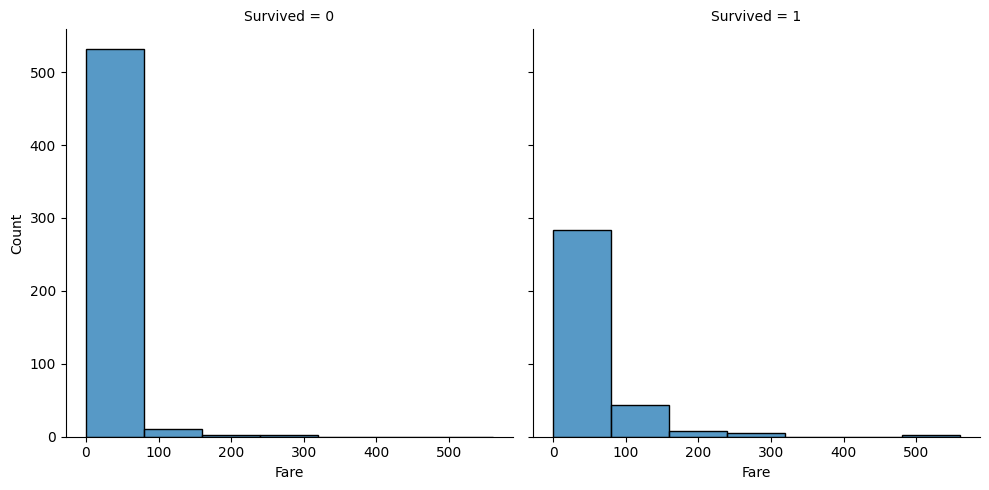

In [158]:
sns.displot(train_df, x = 'Fare', col = 'Survived', binwidth = 80, height = 5)

In [159]:
train_df['Fare_Cut'] = pd.qcut(train_df['Fare'], 6)
test_df['Fare_Cut'] = pd.qcut(test_df['Fare'], 6)

In [160]:
train_df.groupby(['Fare_Cut'], as_index = False)['Survived'].mean()

/tmp/ipykernel_30/3334708280.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Fare_Cut'], as_index = False)['Survived'].mean()


,Fare_Cut,Survived
0,"(-0.001, 7.775]",0.205128
1,"(7.775, 8.662]",0.190789
2,"(8.662, 14.454]",0.366906
3,"(14.454, 26.0]",0.436242
4,"(26.0, 52.369]",0.417808
5,"(52.369, 512.329]",0.697987


In [161]:
# Binning 'Fare' for train_df
train_df.loc[train_df['Fare'] <= 7.775, 'Fare'] = 0
train_df.loc[(train_df['Fare'] > 7.775) & (train_df['Fare'] <= 8.662), 'Fare'] = 1
train_df.loc[(train_df['Fare'] > 8.662) & (train_df['Fare'] <= 14.454), 'Fare'] = 2
train_df.loc[(train_df['Fare'] > 14.454) & (train_df['Fare'] <= 26), 'Fare'] = 3
train_df.loc[(train_df['Fare'] > 26) & (train_df['Fare'] <= 52.369), 'Fare'] = 4
train_df.loc[(train_df['Fare'] > 52.369) & (train_df['Fare'] <= 512.329), 'Fare'] = 5
train_df.loc[train_df['Fare'] > 512.329, 'Fare']  # Assign a value for fares greater than 512.329

# Binning 'Fare' for test_df
test_df.loc[test_df['Fare'] <= 7.775, 'Fare'] = 0
test_df.loc[(test_df['Fare'] > 7.775) & (test_df['Fare'] <= 8.662), 'Fare'] = 1
test_df.loc[(test_df['Fare'] > 8.662) & (test_df['Fare'] <= 14.454), 'Fare'] = 2
test_df.loc[(test_df['Fare'] > 14.454) & (test_df['Fare'] <= 26), 'Fare'] = 3
test_df.loc[(test_df['Fare'] > 26) & (test_df['Fare'] <= 52.369), 'Fare'] = 4
test_df.loc[(test_df['Fare'] > 52.369) & (test_df['Fare'] <= 512.329), 'Fare'] = 5
test_df.loc[test_df['Fare'] > 512.329, 'Fare']   # Assign a value for fares greater than 512.329


343    512.3292
Name: Fare, dtype: float64

In [162]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut,Fare_Cut
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,NaN,S,2,Small,"(20.125, 24.0]","(-0.001, 7.775]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,C85,C,2,Small,"(32.312, 38.0]","(52.369, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,NaN,S,1,Alone,"(24.0, 28.0]","(7.775, 8.662]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,C123,S,2,Small,"(32.312, 38.0]","(52.369, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,NaN,S,1,Alone,"(32.312, 38.0]","(7.775, 8.662]"


In [163]:
train_df['Title'] = train_df['Name'].str.split(pat= ",", expand = True)[1].str.split(pat= ".", expand = True)[0].apply(lambda x : x.strip())
test_df['Title'] = test_df['Name'].str.split(pat= ",", expand = True)[1].str.split(pat= ".", expand = True)[0].apply(lambda x : x.strip())

In [164]:
train_df.groupby(['Title'], as_index = False)['Survived'].mean().head()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000


In [165]:
train_df['Title'] = train_df['Title'].replace({
    'Capt' : 'Military',
    'Col' : 'Military',
    'Major' : 'Military',
    'Jonkheer' : "Noble",
    'The Countess' : 'Noble',
    'Don' : 'Noble',
    'Lady' : 'Noble',
    'Sir' : 'Noble',
    'Mlle' : 'Noble',
    'Ms' : 'Noble',
    'Mme' : 'Noble'    
})

test_df['Title'] = test_df['Title'].replace({
    'Capt' : 'Military',
    'Col' : 'Military',
    'Major' : 'Military',
    'Jonkheer' : "Noble",
    'The Countess' : 'Noble',
    'Don' : 'Noble',
    'Lady' : 'Noble',
    'Sir' : 'Noble',
    'Mlle' : 'Noble',
    'Ms' : 'Noble',
    'Mme' : 'Noble'    
})

In [166]:
train_df.groupby(['Title'], as_index = False)['Survived'].agg(['count','mean'])

,Title,count,mean
0,Dr,7,0.428571
1,Master,40,0.575000
2,Military,5,0.400000
3,Miss,182,0.697802
4,Mr,517,0.156673
5,Mrs,125,0.792000
6,Noble,8,0.750000
7,Rev,6,0.000000
8,the Countess,1,1.000000


In [167]:

# Calculate name length for train_df
train_df['Name_length'] = train_df['Name'].apply(lambda x: len(x))

# Calculate name length for test_df
test_df['Name_length'] = test_df['Name'].apply(lambda x: len(x))


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


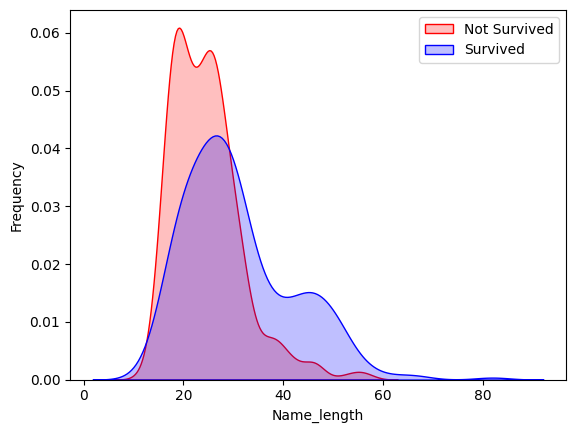

In [168]:
g = sns.kdeplot(train_df['Name_length'][(train_df['Survived']==0) & (train_df['Name_length'].notnull())], color = 'Red', fill = True)
g = sns.kdeplot(train_df['Name_length'][(train_df['Survived']==1) & (train_df['Name_length'].notnull())], color = 'Blue', ax = g, fill = True)
g.set_xlabel('Name_length')
g.set_ylabel('Frequency')
g = g.legend(['Not Survived', 'Survived'])

In [169]:
train_df['Name_lengthGB'] = pd.qcut(train_df['Name_length'], 8)
test_df['Name_lengthGB'] = pd.qcut(test_df['Name_length'], 8)

In [170]:
train_df.groupby(['Name_lengthGB'], as_index = False)['Survived'].mean()

/tmp/ipykernel_30/3536890578.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Name_lengthGB'], as_index = False)['Survived'].mean()


,Name_lengthGB,Survived
0,"(11.999, 18.0]",0.214286
1,"(18.0, 20.0]",0.252427
2,"(20.0, 23.0]",0.307692
3,"(23.0, 25.0]",0.346939
4,"(25.0, 27.25]",0.292929
5,"(27.25, 30.0]",0.428571
6,"(30.0, 38.0]",0.517241
7,"(38.0, 82.0]",0.745283


In [171]:
# Binning 'Name_length' for train_df
train_df.loc[train_df['Name_length'] <= 18, 'Name_Size'] = 0
train_df.loc[(train_df['Name_length'] > 18) & (train_df['Name_length'] <= 20), 'Name_Size'] = 1
train_df.loc[(train_df['Name_length'] > 20) & (train_df['Name_length'] <= 23), 'Name_Size'] = 2
train_df.loc[(train_df['Name_length'] > 23) & (train_df['Name_length'] <= 25), 'Name_Size'] = 3
train_df.loc[(train_df['Name_length'] > 25) & (train_df['Name_length'] <= 27.25), 'Name_Size'] = 4
train_df.loc[(train_df['Name_length'] > 27.25) & (train_df['Name_length'] <= 30), 'Name_Size'] = 5
train_df.loc[(train_df['Name_length'] > 30) & (train_df['Name_length'] <= 38), 'Name_Size'] = 6
train_df.loc[(train_df['Name_length'] > 38) & (train_df['Name_length'] <= 82), 'Name_Size'] = 7
train_df.loc[train_df['Name_length'] > 82, 'Name_Size'] = 8

# Apply binning to 'Name_length' for test_df
test_df.loc[test_df['Name_length'] <= 18, 'Name_Size'] = 0
test_df.loc[(test_df['Name_length'] > 18) & (test_df['Name_length'] <= 20), 'Name_Size'] = 1
test_df.loc[(test_df['Name_length'] > 20) & (test_df['Name_length'] <= 23), 'Name_Size'] = 2
test_df.loc[(test_df['Name_length'] > 23) & (test_df['Name_length'] <= 25), 'Name_Size'] = 3
test_df.loc[(test_df['Name_length'] > 25) & (test_df['Name_length'] <= 27.25), 'Name_Size'] = 4
test_df.loc[(test_df['Name_length'] > 27.25) & (test_df['Name_length'] <= 30), 'Name_Size'] = 5
test_df.loc[(test_df['Name_length'] > 30) & (test_df['Name_length'] <= 38), 'Name_Size'] = 6
test_df.loc[(test_df['Name_length'] > 38) & (test_df['Name_length'] <= 82), 'Name_Size'] = 7
test_df.loc[test_df['Name_length'] > 82, 'Name_Size'] = 8


In [172]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut,Fare_Cut,Title,Name_length,Name_lengthGB,Name_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,NaN,S,2,Small,"(20.125, 24.0]","(-0.001, 7.775]",Mr,23,"(20.0, 23.0]",2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,C85,C,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,51,"(38.0, 82.0]",7.0
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,NaN,S,1,Alone,"(24.0, 28.0]","(7.775, 8.662]",Miss,22,"(20.0, 23.0]",2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,C123,S,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,44,"(38.0, 82.0]",7.0
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,NaN,S,1,Alone,"(32.312, 38.0]","(7.775, 8.662]",Mr,24,"(23.0, 25.0]",3.0


In [173]:
train_df['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [174]:
train_df['TicketNumber'] = train_df['Ticket'].apply(lambda x : pd.Series({'Ticket': x.split()[-1]}))
test_df['TicketNumber'] = test_df['Ticket'].apply(lambda x : pd.Series({'Ticket': x.split()[-1]}))

In [175]:
train_df.groupby(['TicketNumber'], as_index = False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending = False)

,TicketNumber,count,mean
464,347082,7,0.000000
196,2343,7,0.000000
94,1601,7,0.714286
168,2144,6,0.000000
468,347088,6,0.000000
...,...,...,...
271,2662,1,0.000000
272,2663,1,1.000000
273,2664,1,0.000000
276,2667,1,1.000000


In [176]:
train_df.groupby('TicketNumber')['TicketNumber'].transform('count')

0      1
1      1
2      1
3      2
4      1
      ..
886    1
887    1
888    2
889    1
890    1
Name: TicketNumber, Length: 891, dtype: int64

In [177]:
train_df['TicketNumberCounts'] = train_df.groupby('TicketNumber')['TicketNumber'].transform('count')
test_df['TicketNumberCounts'] = test_df.groupby('TicketNumber')['TicketNumber'].transform('count')

In [178]:
train_df.groupby(['TicketNumberCounts'], as_index = False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending = False)

,TicketNumberCounts,count,mean
0,1,544,0.295956
1,2,188,0.569149
2,3,66,0.712121
3,4,44,0.500000
6,7,21,0.238095
5,6,18,0.000000
4,5,10,0.000000


In [179]:
train_df['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [180]:
train_df['Ticket'].str.split(pat = " ", expand = True)

,0,1,2
0,A/5,21171,None
1,PC,17599,None
2,STON/O2.,3101282,None
3,113803,None,None
4,373450,None,None
...,...,...,...
886,211536,None,None
887,112053,None,None
888,W./C.,6607,None
889,111369,None,None


In [181]:


# For train_df
train_df['TicketLocation'] = np.where(
    train_df['Ticket'].str.split(pat=" ", expand=True)[1].notna(),
    train_df['Ticket'].str.split(pat=" ", expand=True)[0].apply(lambda x: x.strip() if isinstance(x, str) else x),
    'Unknown'
)

# For test_df
test_df['TicketLocation'] = np.where(
    test_df['Ticket'].str.split(pat=" ", expand=True)[1].notna(),
    test_df['Ticket'].str.split(pat=" ", expand=True)[0].apply(lambda x: x.strip() if isinstance(x, str) else x),
    'Unknown'
)


In [182]:
train_df['TicketLocation'].value_counts()

TicketLocation
Unknown       665
PC             60
C.A.           27
STON/O         12
A/5            10
W./C.           9
CA.             8
SOTON/O.Q.      8
SOTON/OQ        7
A/5.            7
CA              6
STON/O2.        6
C               5
F.C.C.          5
S.O.C.          5
SC/PARIS        5
SC/Paris        4
S.O./P.P.       3
PP              3
A/4.            3
A/4             3
SC/AH           3
A./5.           2
SOTON/O2        2
A.5.            2
WE/P            2
S.C./PARIS      2
P/PP            2
F.C.            1
SC              1
S.W./PP         1
A/S             1
Fa              1
SCO/W           1
SW/PP           1
W/C             1
S.C./A.4.       1
S.O.P.          1
A4.             1
W.E.P.          1
SO/C            1
S.P.            1
C.A./SOTON      1
Name: count, dtype: int64

In [183]:
train_df['TicketLocation'] = train_df['TicketLocation'].replace({
    'SOTON/O.Q.': 'SOTON/OQ',
    'C.A.': 'CA',
    'CA.': 'CA',
    'A/5.': 'A/5',
    'A./5.': 'A/5',
    'A.5.': 'A/5',
    'A/4.': 'A/4',
    'SC/PARIS' : 'SC/Paris',
    'S.C./PARIS' : 'SC/Paris',
    'W./C.': 'W/C',
})
test_df['TicketLocation'] = test_df['TicketLocation'].replace({
    'SOTON/O.Q.': 'SOTON/OQ',
    'C.A.': 'CA',
    'CA.': 'CA',
    'A/5.': 'A/5',
    'A./5.': 'A/5',
    'A.5.': 'A/5',
    'A/4.': 'A/4',
    'SC/PARIS' : 'SC/Paris',
    'S.C./PARIS' : 'SC/Paris',
    'W./C.': 'W/C',
})



In [184]:
train_df.groupby(['TicketLocation'], as_index = False)['Survived'].agg(['count', 'mean'])

,TicketLocation,count,mean
0,A/4,6,0.000000
1,A/5,21,0.095238
2,A/S,1,0.000000
3,A4.,1,0.000000
4,C,5,0.400000
5,C.A./SOTON,1,0.000000
6,CA,41,0.341463
7,F.C.,1,0.000000
8,F.C.C.,5,0.800000
9,Fa,1,0.000000


In [185]:
train_df['Cabin'] = train_df['Cabin'].fillna('U')
train_df['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in train_df['Cabin']])

test_df['Cabin'] = test_df['Cabin'].fillna('U')
test_df['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in train_df['Cabin']])

In [186]:
train_df.groupby(['Cabin'], as_index = False)['Survived'].agg(['count', 'mean'])

,Cabin,count,mean
0,A,15,0.466667
1,B,47,0.744681
2,C,59,0.593220
3,D,33,0.757576
4,E,32,0.750000
5,F,13,0.615385
6,G,4,0.500000
7,T,1,0.000000
8,U,687,0.299854


In [187]:
train_df['Cabin_Assigned'] = train_df['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)
test_df['Cabin_Assigned'] = test_df['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)

In [188]:
train_df.groupby(['Cabin_Assigned'], as_index = False)['Survived'].agg(['count', 'mean'])

,Cabin_Assigned,count,mean
0,0,687,0.299854
1,1,204,0.666667


In [189]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_Cut,Fare_Cut,Title,Name_length,Name_lengthGB,Name_Size,TicketNumber,TicketNumberCounts,TicketLocation,Cabin_Assigned
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,...,"(20.125, 24.0]","(-0.001, 7.775]",Mr,23,"(20.0, 23.0]",2.0,21171,1,A/5,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,...,"(32.312, 38.0]","(52.369, 512.329]",Mrs,51,"(38.0, 82.0]",7.0,17599,1,PC,1
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,...,"(24.0, 28.0]","(7.775, 8.662]",Miss,22,"(20.0, 23.0]",2.0,3101282,1,STON/O2.,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,...,"(32.312, 38.0]","(52.369, 512.329]",Mrs,44,"(38.0, 82.0]",7.0,113803,2,Unknown,1
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,...,"(32.312, 38.0]","(7.775, 8.662]",Mr,24,"(23.0, 25.0]",3.0,373450,1,Unknown,0


In [190]:
train_df.shape

(891, 24)

In [191]:
test_df.shape

(418, 23)

In [192]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   PassengerId          891 non-null    int64   
 1   Survived             891 non-null    int64   
 2   Pclass               891 non-null    int64   
 3   Name                 891 non-null    object  
 4   Sex                  891 non-null    object  
 5   Age                  714 non-null    float64 
 6   SibSp                891 non-null    int64   
 7   Parch                891 non-null    int64   
 8   Ticket               891 non-null    object  
 9   Fare                 891 non-null    float64 
 10  Cabin                891 non-null    object  
 11  Embarked             889 non-null    object  
 12  Family_Size          891 non-null    int64   
 13  Family_Size_Grouped  789 non-null    object  
 14  Age_Cut              714 non-null    category
 15  Fare_Cut             89

In [193]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Size',
       'Family_Size_Grouped', 'Age_Cut', 'Fare_Cut', 'Title', 'Name_length',
       'Name_lengthGB', 'Name_Size', 'TicketNumber', 'TicketNumberCounts',
       'TicketLocation', 'Cabin_Assigned'],
      dtype='object')

In [194]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   PassengerId          418 non-null    int64   
 1   Pclass               418 non-null    int64   
 2   Name                 418 non-null    object  
 3   Sex                  418 non-null    object  
 4   Age                  332 non-null    float64 
 5   SibSp                418 non-null    int64   
 6   Parch                418 non-null    int64   
 7   Ticket               418 non-null    object  
 8   Fare                 417 non-null    float64 
 9   Cabin                418 non-null    object  
 10  Embarked             418 non-null    object  
 11  Family_Size          418 non-null    int64   
 12  Family_Size_Grouped  369 non-null    object  
 13  Age_Cut              332 non-null    category
 14  Fare_Cut             417 non-null    category
 15  Title                41

In [195]:
# Fill missing 'Age' values in both train and test sets using the mean from the train set
age_mean = train_df['Age'].mean()
train_df['Age'].fillna(age_mean, inplace=True)
test_df['Age'].fillna(age_mean, inplace=True)

# Fill missing 'Fare' values in the test set using the mean from the train set
fare_mean = train_df['Fare'].mean()
test_df['Fare'].fillna(fare_mean, inplace=True)


/tmp/ipykernel_30/1474551044.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(age_mean, inplace=True)
/tmp/ipykernel_30/1474551044.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [196]:
ohe = OneHotEncoder(sparse_output = False)
ode = OrdinalEncoder
SI = SimpleImputer(strategy = 'most_frequent')

In [197]:
ode_cols = ['Family_Size_Grouped']
ohe_cols = ['Sex', 'Embarked']


In [198]:
X = train_df.drop(['Survived'], axis = 1)
y = train_df['Survived']
X_test = test_df.drop(["Age_Cut", 'Fare_Cut'], axis = 1)

In [199]:
X_train, X_valid, y_valid, y_valid = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 21)

In [200]:
ordinal_pipeline = Pipeline(steps = [
    ('impute', SimpleImputer(strategy = 'most_frequent')),
    ('ord', OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = -1))
])


In [201]:

ohe_pipeline = Pipeline(steps = [
    ('impute', SimpleImputer(strategy = 'most_frequent')),
    ('one-hot',OneHotEncoder(handle_unknown = 'ignore', sparse_output = False))
])

In [205]:
cols_trans = ColumnTransformer(transformers=[
    ('impute', SI, ['Age']),
    ('ord_pipeline', ordinal_pipeline, ode_cols),
    ('ohe_pipeline', ohe_pipeline, ohe_cols),
    ('passthrough', 'passthrough', ['Pclass', 'TicketNumberCounts', 'Cabin_Assigned', 'Name_Size', 'Age', 'Fare'])
],

    remainder = 'drop',
    n_jobs=-1
)
